In [166]:
import torch
import torchvision

## Autograd

In [167]:
x = torch.randn(3, requires_grad = True)
x

tensor([-0.4292,  0.9686,  0.3466], requires_grad=True)

In [168]:
y = x + 2
y

tensor([1.5708, 2.9686, 2.3466], grad_fn=<AddBackward0>)

pytorch cria um grafo computacional quando uma operação é realizada em um tensor que requer gradiente.

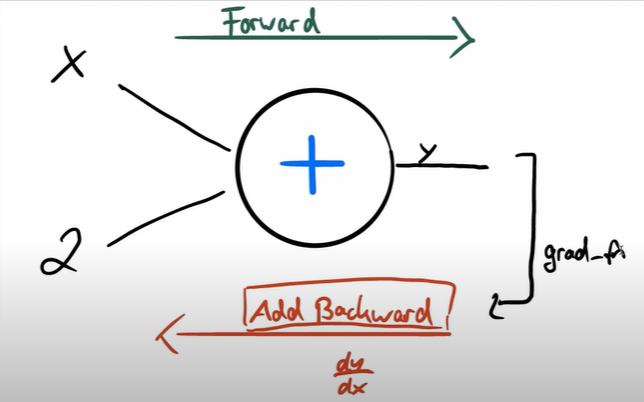

In [169]:
z = y * y * 2
z

tensor([ 4.9348, 17.6250, 11.0127], grad_fn=<MulBackward0>)

In [170]:
z = z.mean()
z

tensor(11.1908, grad_fn=<MeanBackward0>)

In [171]:
z.backward() # dz/dx
print(x.grad)

tensor([2.0944, 3.9581, 3.1287])


In [172]:
v = torch.tensor([1,1,1])
y.backward(v)
print(x.grad)

tensor([3.0944, 4.9581, 4.1287])


Removendo dependência do gradiente

In [173]:
x.requires_grad_(False)
print(x)

tensor([-0.4292,  0.9686,  0.3466])


In [174]:
y = x.detach()
print(y)

tensor([-0.4292,  0.9686,  0.3466])


In [175]:
with torch.no_grad():
    y = x + 2
    print(y)

tensor([1.5708, 2.9686, 2.3466])


Exemplo dummy com pesos fixos

In [181]:
weights = torch.ones(4, requires_grad = True)

for epoch in range(1):
    model_output = (weights * 3).sum()
    model_output.backward()
    print(weights.grad)

tensor([3., 3., 3., 3.])


In [182]:
weights = torch.ones(4, requires_grad = True)
for epoch in range(2):
    model_output = (weights * 3).sum()
    model_output.backward()
    print(weights.grad)

tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])


In [186]:
weights = torch.ones(4, requires_grad = True)
for epoch in range(2): 
    model_output = (weights * 3).sum()
    model_output.backward()
    print(weights.grad)
    weights.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


Também devemos zerar os gradientes após cada iteração do processo de otimização